In [1]:
#using Pkg
using Plots
using DelimitedFiles
using Dierckx
include("../src/MurcaNoneqNumerical.jl")
using .MurcaNoneqNumerical
include("../src/MurcaReductionFit.jl")
using .MurcaReductionFit
include("../src/MurcaNoneqZeroTemp.jl")
using .MurcaNoneqZeroTemp

In [2]:
pyplot()

Plots.PyPlotBackend()

# Check quality of numerical integration

In [3]:
function HM(xi::Float64)::Float64
    return (14680.0*xi)/(11513.0*pi^2) + (7560.0*xi^3)/(11513.0*pi^4) + (840*xi^5)/(11513.0*pi^6) + (24.0*xi^7)/(11513.0*pi^8)
end

HM (generic function with 1 method)

In [12]:
xis = exp10.(-1:0.5:3)
#Ips_nonSF = Ip_SFnp.(0., 0., xis, 10, 0.01)
Ips_nonSF = Ip_SFnp.(0., 0., xis, 10)

9-element Array{Array{Float64,1},1}:
 [0.0198778, 0.986102]   
 [0.0259826, 0.913891]   
 [0.164526, 1.5038]      
 [0.64951, 2.46451]      
 [25.0733, 248.199]      
 [4277.76, 21319.4]      
 [1.33814e7, 1.97695e8]  
 [4.23158e10, 1.97695e12]
 [1.33814e14, 1.97695e16]

In [5]:
Ips_nonSF_zeroT = Ip_rate_SFnp_trp.(1e-4, 1e-4, xis)

9-element Array{Float64,1}:
    2.195199978223546e-14
    6.945471370830508e-11
    2.1964897517129997e-7
    0.0006945955855019793
    2.196506708543981    
 6945.947519155541       
    2.19649682638502e7   
    6.945926406549013e10 
    2.19649407478821e14  

In [6]:
HM.(xis)

9-element Array{Float64,1}:
    0.012926006874872456 
    0.04106771684235321  
    0.1360099076454356   
    0.6464104706614338   
   17.819163845895844    
 9564.573587398454       
    2.273534751232633e7  
    6.971443447590666e10 
    2.1977271023484147e14

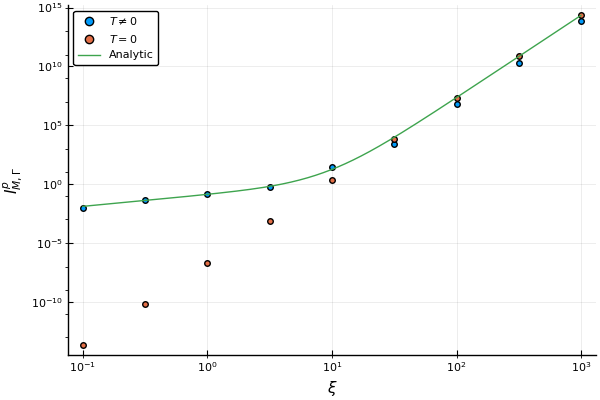

In [11]:
scatter(xis, map(x->x[1], Ips_nonSF), scale=:log10, label="\$ T\\neq 0 \$")
scatter!(xis, Ips_nonSF_zeroT, label="\$ T=0 \$")
plot!(0.1:0.1:1000, HM.(0.1:0.1:1000), label="Analytic")
xlabel!("\$ \\xi \$")
ylabel!("\$ I_{M, \\Gamma}^p \$")

Eaxct numerical integration is good only for $\xi \lesssim 10$

Higher order Gauss-Laguerre qudrature ($ n >5$) may improve large $\xi$ region.

In [27]:
xi = 100.
cts = 0:0.1:1
R_nonSF_ct = Itilde_p_SFnp.(10., 4., xi, cts, 10)/ HM(xi)

11-element Array{Array{Float64,1},1}:
 [2.19424, 39.5491]   
 [2.21076, 39.8956]   
 [2.25914, 40.9136]   
 [2.33542, 42.5318]   
 [2.42937, 44.5644]   
 [2.50468, 46.3393]   
 [2.40798, 44.9749]   
 [1.7121, 32.305]     
 [0.609383, 11.6217]  
 [0.119209, 2.29869]  
 [0.0182044, 0.355014]

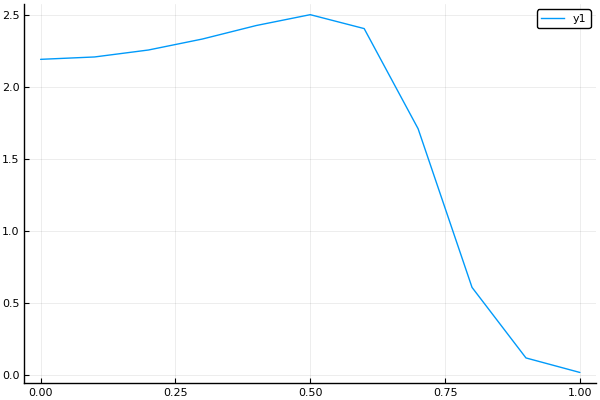

In [24]:
plot(cts, map(x->x[1], R_nonSF_ct))

In [58]:
xi = 100.
vn = 20.
vp = 20.

cts = 0:0.5:1
R_nonSF_ct = Itilde_p_SFnp.(vn, vp, xi, cts, 30)/ HM(xi)
@show 1.0/6.0 * (R_nonSF_ct[1][1] + 4*R_nonSF_ct[2][1] + R_nonSF_ct[3][1])
#@show Ips_nonSF = Ip_SFnp.(vn, vp, xi, 10, 0.01)/ HM(xi)
@show Ip_rate_SFnp_trp.(vn, vp, xi)/ HM(xi)

(1.0 / 6.0) * ((R_nonSF_ct[1])[1] + 4 * (R_nonSF_ct[2])[1] + (R_nonSF_ct[3])[1]) = 0.002467155279937361
Ip_rate_SFnp_trp.(vn, vp, xi) / HM(xi) = 0.0005224905158246219


0.0005224905158246219

# Both proton and neutron superfluidity

In [ ]:
"""
The code below takes a bit long time
"""
#vs = 0.0:0.5:5.0
#n=5
#list_Ip_SFnp = [Ip_SFnp(vn, vp, n, 0.001) for vn=vs, vp=vs];
#list_In_SFnp = [In_SFnp(vn, vp, n, 0.01, 0.1) for vn=vs, vp=vs];

In [96]:
# We import already calculated ones; 21 points for both vn and vp
list_In_SFnp = readdlm("../output_data/list_In_SFnp.dat", ' ', Float64, '\n', comments=true);
matsize = 21
vs = [list_In_SFnp[21*i,1] for i in 1:matsize]
mat_In_SFnp = reshape(list_In_SFnp[:,3], matsize, matsize);

In [97]:
list_In_SFnp_fit = transpose([In_SFnp_fit(vn, vp) for vn=vs, vp=vs]);

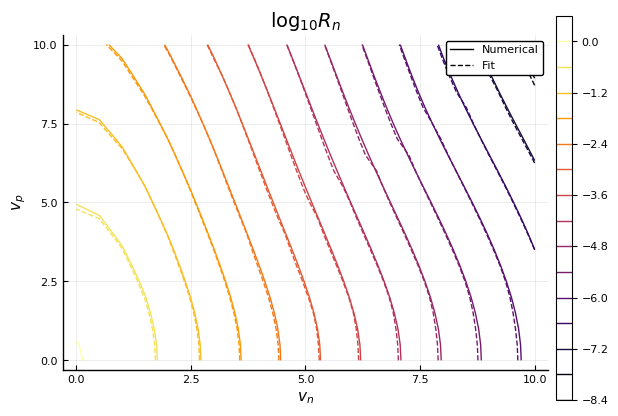

In [99]:
contour(vs, vs, log10.(mat_In_SFnp))
contour!(vs, vs, log10.(list_In_SFnp_fit), linestyle=:dash)
plot!([], [], color=:black, linestyle=:solid, label="Numerical", legend=:topright)
plot!([], [], color=:black, linestyle=:dash, label="Fit", legend=:topright)
title!("\$\\log_{10} R_n\$")
ylabel!("\$v_p\$")
xlabel!("\$v_n\$")
#savefig("murca_reduction_nbr_SFnp.pdf")

In [100]:
list_Ip_SFnp = readdlm("../output_data/list_Ip_SFnp.dat", ' ', Float64, '\n', comments=true);
matsize = 21
vs = [list_Ip_SFnp[21*i,1] for i in 1:matsize]
mat_Ip_SFnp = reshape(list_Ip_SFnp[:,3], matsize, matsize);

In [101]:
list_Ip_SFnp_fit = transpose([Ip_SFnp_fit(vn, vp) for vn=vs, vp=vs]);

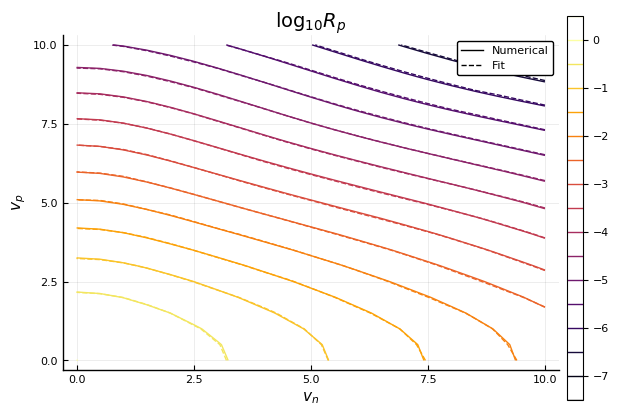

In [102]:
contour(vs, vs, log10.(mat_Ip_SFnp))
contour!(vs, vs, log10.(list_Ip_SFnp_fit), linestyle=:dash)
plot!([], [], color=:black, linestyle=:solid, label="Numerical", legend=:topright)
plot!([], [], color=:black, linestyle=:dash, label="Fit", legend=:topright)
title!("\$\\log_{10} R_p\$")
ylabel!("\$v_p\$")
xlabel!("\$v_n\$")
savefig("murca_reduction_pbr_SFnp.pdf")